In [2]:
import yfinance as yf
import numpy
from backtesting import Backtest, Strategy #pip install backtesting; pip install pandas_datareader
import pandas_ta as ta
import talib 
### pip install alphaVantage-api
from ipynb.fs.full.watchlist import Watchlist #pip install ipynb defs (class or function); full (all)

C:\Users\Julio\anaconda3\lib\site-packages\backtesting\_plotting.py:50: UserWarning: Jupyter Notebook detected. Setting Bokeh output to notebook. This may not work in Jupyter clients without JavaScript support (e.g. PyCharm, Spyder IDE). Reset with `backtesting.set_bokeh_output(notebook=False)`.
  warnings.warn('Jupyter Notebook detected. '


Loading BokehJS ...

In [3]:
data=yf.download(tickers = 'BTC-USD', start='2014-09-23', end = '2023-11-10') #daily
data.head(10)

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-23,402.092010,441.557007,396.196991,435.790985,435.790985,45099500
2014-09-24,435.751007,436.112000,421.131989,423.204987,423.204987,30627700
2014-09-25,423.156006,423.519989,409.467987,411.574005,411.574005,26814400
2014-09-26,411.428986,414.937988,400.009003,404.424988,404.424988,21460800
2014-09-27,403.556000,406.622986,397.372009,399.519989,399.519989,15029300
2014-09-28,399.471008,401.016998,374.332001,377.181000,377.181000,23613300
2014-09-29,376.928009,385.210999,372.239990,375.467010,375.467010,32497700
2014-09-30,376.088013,390.976990,373.442993,386.944000,386.944000,34707300
2014-10-01,387.427002,391.378998,380.779999,383.614990,383.614990,26229400


[i] Loaded BTC[D]: BTC_D.csv


,open,high,low,close,volume,SMA_10,SMA_20,SMA_50,SMA_200,VOL_SMA_20
date,,,,,,,,,,
2020-10-02,100.0800,100.0800,100.0500,100.0550,87090.0,NaN,NaN,NaN,NaN,NaN
2020-10-05,100.0300,100.0400,99.9950,99.9950,10725.0,NaN,NaN,NaN,NaN,NaN
2020-10-06,100.0100,100.0300,100.0100,100.0300,10080.0,NaN,NaN,NaN,NaN,NaN
2020-10-07,99.9500,99.9600,99.9200,99.9200,6350.0,NaN,NaN,NaN,NaN,NaN
2020-10-08,99.9900,99.9950,99.9717,99.9950,650.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2024-01-17,91.9100,91.9287,91.9100,91.9287,1204.0,92.08899,92.362450,91.493402,91.224944,431.05
2024-01-18,91.9250,91.9250,91.9250,91.9250,7.0,92.06049,92.330200,91.531602,91.223644,374.75
2024-01-19,91.8266,91.8417,91.8266,91.8417,306.0,92.05016,92.290605,91.572946,91.220492,360.60


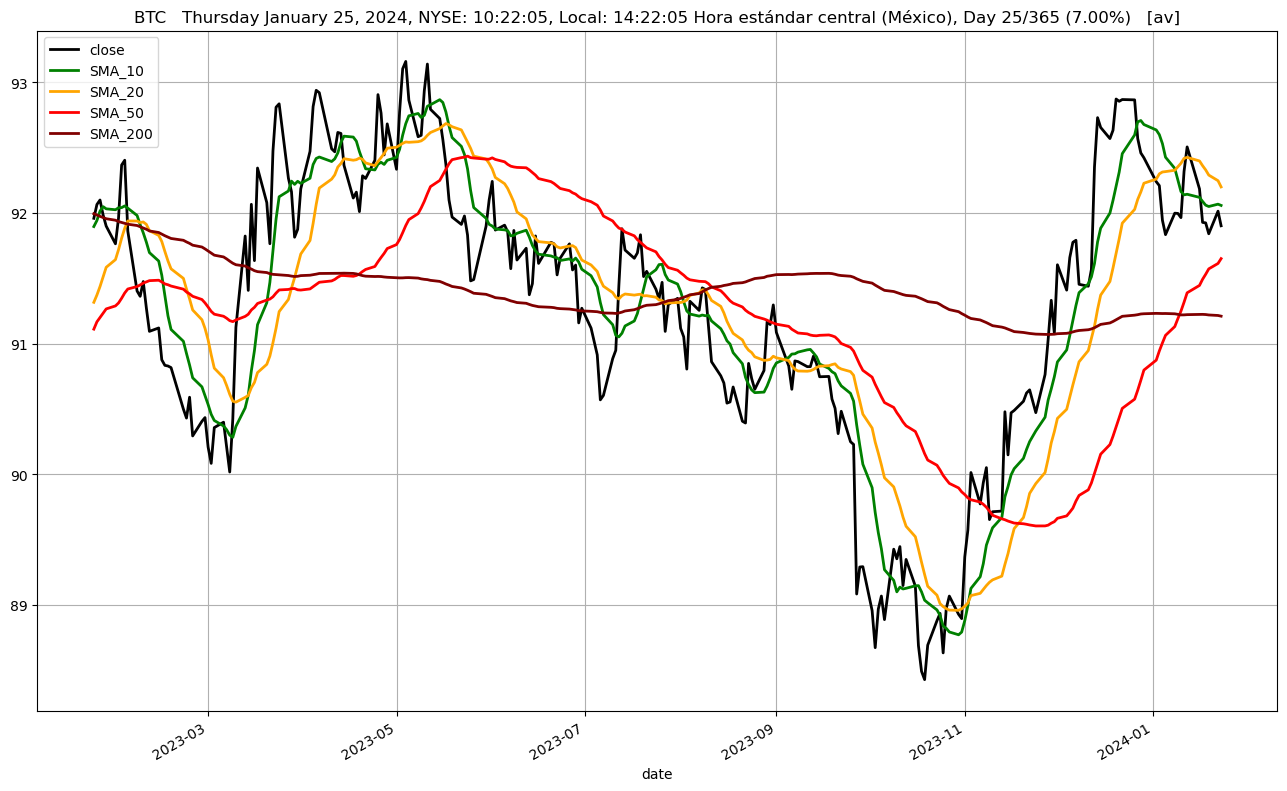

In [4]:
data_source = "av"
watch = Watchlist(["BTC"], ds_name=data_source, timed=False)
watch.load("BTC", plot=True)

In [5]:
data=data/10e8
data


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-23,4.020920e-07,4.415570e-07,3.961970e-07,4.357910e-07,4.357910e-07,0.045100
2014-09-24,4.357510e-07,4.361120e-07,4.211320e-07,4.232050e-07,4.232050e-07,0.030628
2014-09-25,4.231560e-07,4.235200e-07,4.094680e-07,4.115740e-07,4.115740e-07,0.026814
2014-09-26,4.114290e-07,4.149380e-07,4.000090e-07,4.044250e-07,4.044250e-07,0.021461
2014-09-27,4.035560e-07,4.066230e-07,3.973720e-07,3.995200e-07,3.995200e-07,0.015029
...,...,...,...,...,...,...
2023-11-05,3.509001e-05,3.534034e-05,3.459424e-05,3.504936e-05,3.504936e-05,12.412744
2023-11-06,3.504479e-05,3.528603e-05,3.476536e-05,3.503737e-05,3.503737e-05,12.693436
2023-11-07,3.504779e-05,3.589242e-05,3.454582e-05,3.544356e-05,3.544356e-05,18.834738


In [6]:
class A(Strategy):
    def init(self):
        self.emaFast = self.I(talib.EMA,self.data.Close,timeperiod=200)
        
    def next(self):
        price = self.data.Close[-1]
        
        if price > self.emaFast[-1] and not self.position.is_long:
            self.buy()
            
        elif price < self.emaFast[-1] and self.position.is_long:
            self.position.close()
            
bt = Backtest(data,A)


In [7]:
stats=bt.run()
stats

Start                     2014-09-23 00:00:00
End                       2023-11-09 00:00:00
Duration                   3334 days 00:00:00
Exposure Time [%]                    59.52024
Equity Final [$]               1607806.031239
Equity Peak [$]                2470954.296096
Return [%]                       15978.060312
Buy & Hold Return [%]             8319.890786
Return (Ann.) [%]                    74.36602
Volatility (Ann.) [%]               102.29545
Sharpe Ratio                         0.726973
Sortino Ratio                        2.098153
Calmar Ratio                         1.078975
Max. Drawdown [%]                  -68.922845
Avg. Drawdown [%]                   -9.550972
Max. Drawdown Duration     1070 days 00:00:00
Avg. Drawdown Duration       49 days 00:00:00
# Trades                                   32
Win Rate [%]                            31.25
Best Trade [%]                    3269.065985
Worst Trade [%]                     -9.864753
Avg. Trade [%]                    

In [8]:
bt.plot()

C:\Users\Julio\anaconda3\lib\site-packages\backtesting\_plotting.py:250: UserWarning: DatetimeFormatter scales now only accept a single format. Using the first provided: '%d %b'
  formatter=DatetimeTickFormatter(days=['%d %b', '%a %d'],
C:\Users\Julio\anaconda3\lib\site-packages\backtesting\_plotting.py:250: UserWarning: DatetimeFormatter scales now only accept a single format. Using the first provided: '%m/%Y'
  formatter=DatetimeTickFormatter(days=['%d %b', '%a %d'],
C:\Users\Julio\anaconda3\lib\site-packages\backtesting\_plotting.py:659: UserWarning: found multiple competing values for 'toolbar.active_drag' property; using the latest value
  fig = gridplot(
C:\Users\Julio\anaconda3\lib\site-packages\backtesting\_plotting.py:659: UserWarning: found multiple competing values for 'toolbar.active_scroll' property; using the latest value
  fig = gridplot(


GridPlot(id='p1299', ...)